# Segment Area

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from segment_anything import SamPredictor

from app import load_image, get_embedding, SAM
from config import DATA_DIR

Using device: cuda:0
Loading model...
Loaded model in 49.72s


In [2]:
def show_mask(mask, ax):
    """Display a mask on a given matplotlib axis."""
    color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=375):
    """Plot coordinates as points on a given matplotlib axis with different colors based on labels."""
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

def show_box(box, ax):
    """Draw a box on a given matplotlib axis."""
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

In [3]:
# Set fixed seeds for reproducibility across PyTorch and NumPy operations.
torch.manual_seed(2023)
torch.cuda.empty_cache()
torch.cuda.manual_seed(2023)
np.random.seed(2023)

In [4]:
PREDICTOR = SamPredictor(sam_model=SAM)

In [5]:
IMAGE_NAME = "317947"
IMAGE_PATH = str(DATA_DIR.joinpath(f"{IMAGE_NAME}.jpg"))

IMAGE = load_image(IMAGE_PATH)
PREDICTOR.set_image(image=IMAGE)

EMBEDDING = get_embedding(predictor=PREDICTOR, name=IMAGE_NAME)

Loaded image C:\Users\punit\projects\research\clotscape\data\317947.jpg with shape: (742, 932, 3)
Loading embedding from C:\Users\punit\projects\research\clotscape\data\embeddings\317947.npy


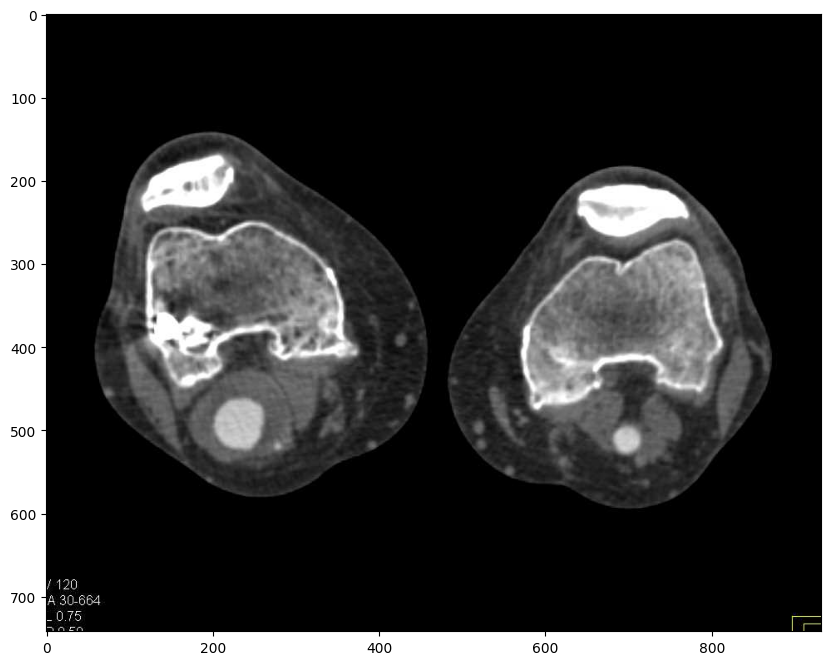

In [6]:
plt.figure(figsize=(10, 10))
plt.imshow(IMAGE)
plt.axis('on')
plt.show()

Set the inputs

In [24]:
input_box = np.array([575, 425, 775, 575])
input_point = np.array([[700, 515]])
input_label = np.array([0])

Predict masks

In [27]:
masks, scores, logits = PREDICTOR.predict(
    point_coords=input_point,
    point_labels=input_label,
    box=input_box,
    multimask_output=True,
)
print(masks.shape)
print(scores)

(3, 742, 932)
[0.88645345 0.93821156 0.95910716]


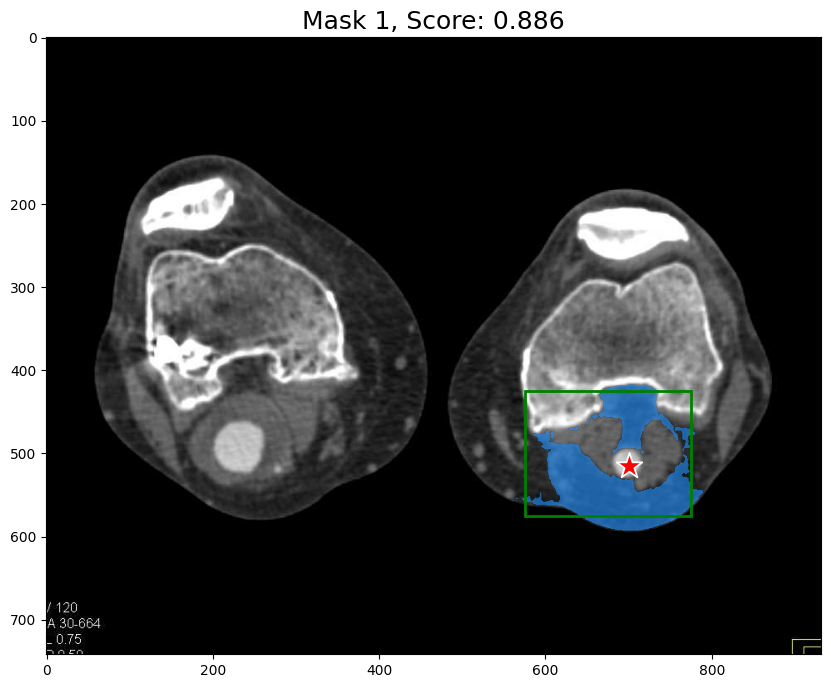

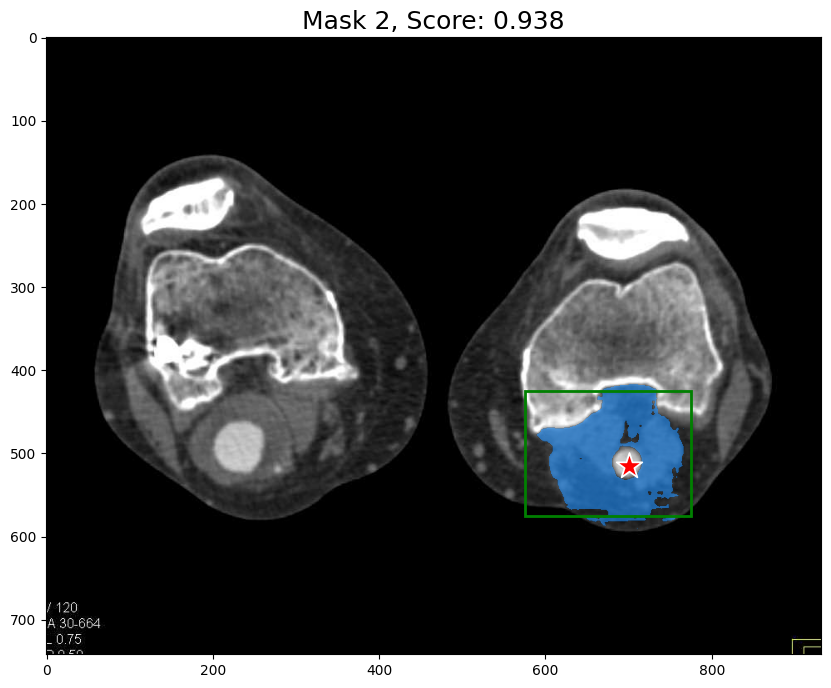

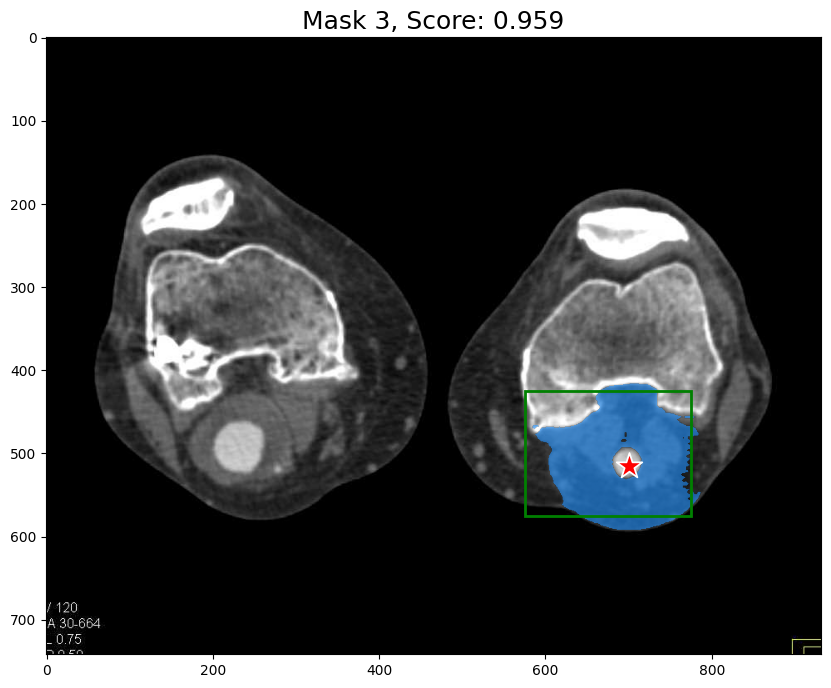

In [28]:
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10,10))
    plt.imshow(IMAGE)
    show_mask(mask, plt.gca())
    show_box(input_box, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('on')
    plt.show()